In [105]:
import numpy as np
import pandas as pd
from read_data import read_data
from image import image_process
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import time
import re

In [106]:
X,y = read_data()

In [107]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
y

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


**How's the dataset actually looks like** <br>
------
Just a little bit unclear, overall very clean dataset...

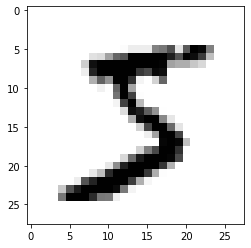

In [109]:
digits = X

img = image_process(digits)
img.show_image(0)


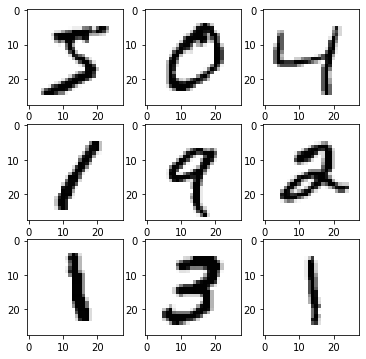

In [110]:
img = image_process(digits)
img.show_nine_image(0)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# flatten the column vector y to 1-D array
y_train = np.ravel(y_train,order='c')
y_test = np.ravel(y_test, order='c')

In [112]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
y_train

array([8, 8, 4, ..., 4, 5, 5])

In [114]:
print(X_train.shape, y_train.shape)

(49000, 784) (49000,)


**How are different classification models perform**
-----

In [115]:
reg = LogisticRegression(solver="liblinear")

reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.9143809523809524

In [116]:
# cross-validation for Logistic Regression
cv = cross_val_score(reg, X_train, y_train, cv = 5)
print(cv)
print(cv.mean()) # average accuracy from cross-validation is 91.57% using logistic regression

[0.91826531 0.91510204 0.91806122 0.91469388 0.91683673]
0.9165918367346938


In [117]:
mlp = MLPClassifier()

mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

0.9768095238095238

In [118]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9673333333333334

In [119]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

knn_predict = knn.predict(X_test)

**The actual visualization**
------

### Confusion Matrix
1. Visualize and compare the performance of Logistic Regression and KNN
2. KNN has a higher accuracy across all digits compared to Logistic Regression
3. Both models show inaccurary with predicting digits 2, 3, and 8

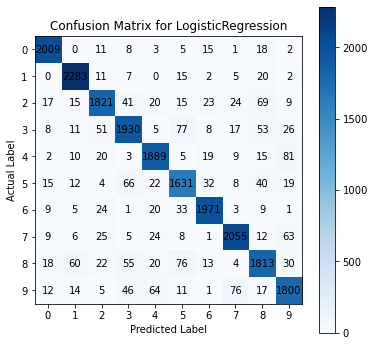

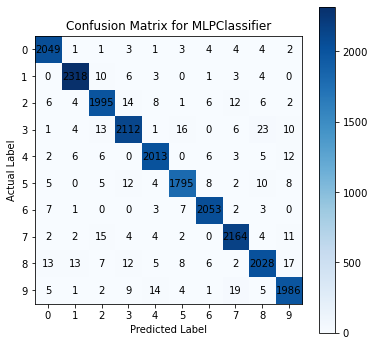

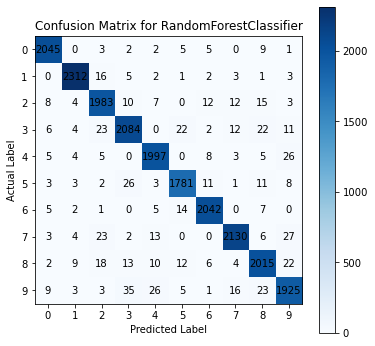

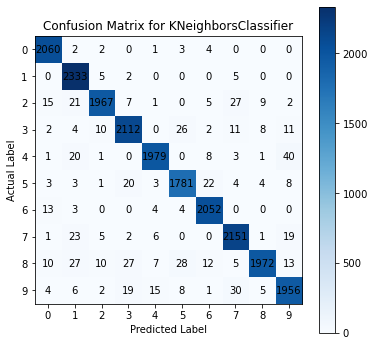

In [122]:
models = [reg, mlp, rf, knn]

for model in models:
    model_predict = model.predict(X_test)
    # This regular expression get rid of the (solver="liblinear") part in
    # LogisticRegression(solver="liblinear") to make our label prettier
    title = re.sub('\([^()]*\)', '', str(model))
    image_process.confusion_matrix(y_test, model_predict, title)



**How to interprete these matrices?**
1. For entry i, j in the matrix, the number in it represents the number of predicts which has predicted label i and actual label j.
2. As can be seen in the color bar on the right hand side, darker blue means more, so we can see most of samples are predicted correctly for all the models.
3. One particularly intresting thing is that, it seems that our models are good at predicting different kinds of numbers, for example, logistic regression often confuses between 1 and 8, but random forest and KNN did super good on it.

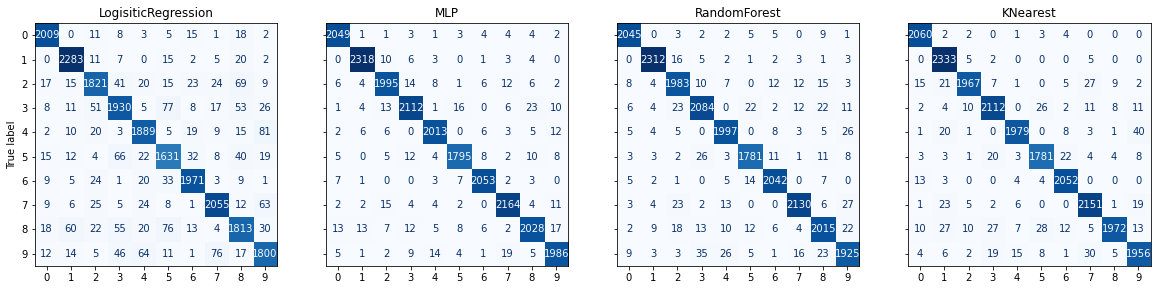

In [123]:
# This produces a much better shaped graphs for confusion matrices, we can actually see the comparison now...
models = {
    "LogisiticRegression": reg,
    'MLP': mlp,
    'RandomForest': rf,
    "KNearest": knn
}

fig, axes = plt.subplots(1,4, sharex=True, sharey=True,figsize=(20,10))

for i, (key, classifier) in enumerate(models.items()):
    model_predict = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, model_predict)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], cmap=plt.cm.Blues)
    disp.ax_.set_title(key)
    disp.ax_.set_xlabel('')
    disp.im_.colorbar.remove()
    # plt.colorbar(disp.im_, ax=axes[i], fraction=0.046, pad=0.04)

    if i!=0:
        disp.ax_.set_ylabel('')


### Efficiency Plot
time vs. Score on different model

In [124]:
import time

def get_time(models, X_train, y_train, X_test, y_test):
    """ Get effiency of each model

    Args:
        models: list of machine learning models that we would like to know its efficiency and performance
        X_train: Training features
        y_train: Training labels
        X_test: Testing features
        y_test: Testing labels

    Returns:
        List[float], List[float]: Score of models, Execution time of models
    """
    score = []
    execution_time = []

    for model in models:
        start_time = time.time()
        model.fit(X_train, y_train)
        score.append(model.score(X_test, y_test))
        execution_time.append(time.time()-start_time)
        
    return np.round(score,4), np.round(execution_time,4)

In [125]:
models = [LogisticRegression(solver="liblinear"), MLPClassifier(), RandomForestClassifier(), KNeighborsClassifier()]
score_time = get_time(models, X_train, y_train, X_test, y_test)

In [126]:
score_time_ratio = []
for i in range(len(score_time[0])):
    score_time_ratio.append(score_time[0][i] / score_time[1][i])
print(score_time, score_time_ratio)


(array([0.9144, 0.9755, 0.9673, 0.9697]), array([ 90.1676, 108.4456,  42.9511,  59.4242])) [0.01014111499030694, 0.008995293492774259, 0.022520959882284742, 0.016318267641802497]


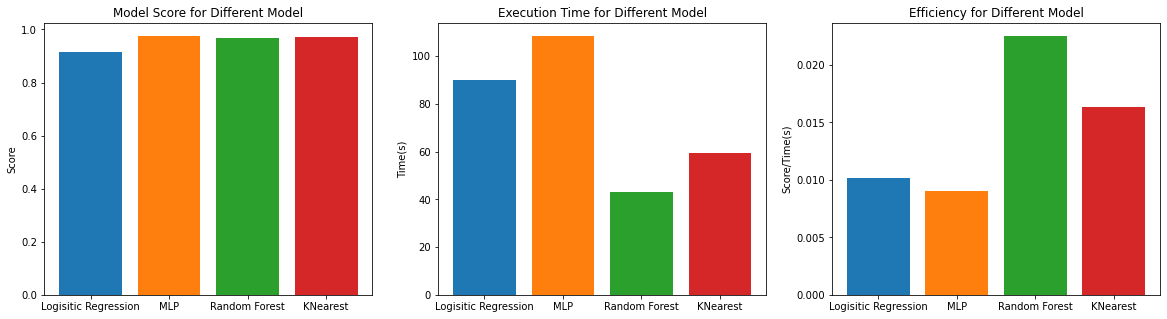

In [127]:
models_label = [
    "Logisitic Regression",
    'MLP',
    'Random Forest',
    "KNearest"
]

fig, ax = plt.subplots(1, 3, figsize = (20,5))

for i in range(len(score_time[0])):
    ax[0].bar(models_label[i], score_time[0][i])
    ax[1].bar(models_label[i], score_time[1][i])
    ax[2].bar(models_label[i], score_time_ratio[i])
    ax[0].set(title = "Model Score for Different Model", ylabel = "Score")
    ax[1].set(title = "Execution Time for Different Model", ylabel = "Time(s)")
    ax[2].set(title = "Efficiency for Different Model", ylabel = "Score/Time(s)")

**Interpreting these histograms**
1. It seems that logistic regression is bad in this particular dataset. It's not that accurate, and takes a long time...
2. Multilayer perceptron is good in performance, but in the same time it's quite time consuming. I guess that's like a typical neural network behavior, which seems to take a lot of resourses.
3. KNN and Random Forest seems to be the best algorithms to employ here. They both have good performance (KNN is slightly higher but within range of error), and they are both resource friendly.

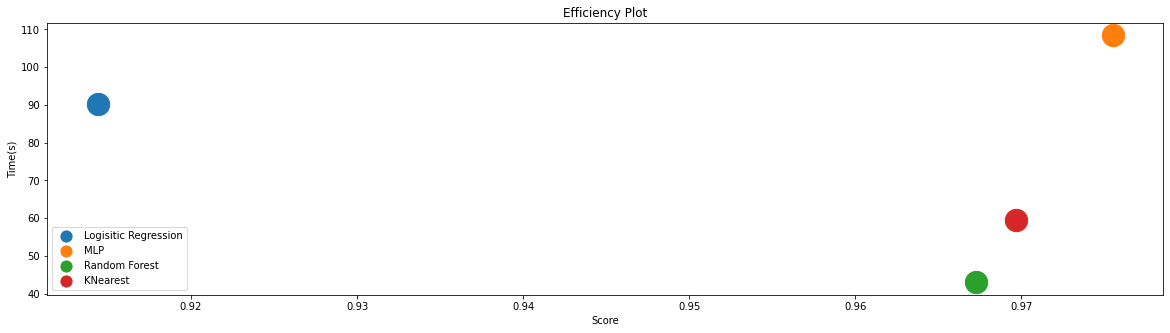

In [140]:
models_label = [
    "Logisitic Regression",
    'MLP',
    'Random Forest',
    "KNearest"
]

fig, ax = plt.subplots(1, 1, figsize = (20,5))

for i in range(len(score_time[0])):
    x, y = score_time[0][i], score_time[1][i]
    ax.scatter(x, y, s = 500)
    ax.legend(models_label, loc = "lower left", markerscale = 0.5)
    ax.set(title = "Efficiency Plot", ylabel = "Time(s)", xlabel = "Score")

**Interpreting this four big point graph**
1. This plot plots one time behavior (score vs. time(s)) for all four standard classification models.
2. Points that close to bottom left are better in general.
3. So we have a trade-off to decide between choosing red and green point.